# Inverstigation of EDP

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }<\style>"))

In [2]:
import datetime
print(datetime.datetime.now())

2019-01-27 14:38:51.154695


In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
from __future__ import division
import pandas as pd ; pd.set_option("display.max_columns",200)
import numpy as np
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [6]:
result_path = u"C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Program/Program_only_married_couples/hdf_married_couples/"

In [7]:
df = pd.read_hdf(result_path+"married_couples_step_2.h5", "fiscr")

In [8]:

#df_panact = pd.read_hdf(store_path, 'PANACT')
#df_panact_2005 = df_panact[df_panact.AN>=2005]
#df_panact_2005.to_hdf('C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2015/Data/hdf/dads','start_2005' )

We define the taxable income (Revenu Brut Global) based on the 7 income categories present in the database.

In [9]:
df["Rbg_2011"] =(( df.ZTSAM_2011*0.9) + df.ZRAGM_2011 + df.ZRACM_2011 + df.ZRNCM_2011 + df.ZFONM_2011 + df.ZPERM_2011*0.9
                    + df.ZRICM_2011)
df["Rbg_2014"] =(( df.ZTSAM_2014*0.9) + df.ZRAGM_2014 + df.ZRACM_2014 + df.ZRNCM_2014 + df.ZFONM_2014 + df.ZPERM_2014*0.9
                    + df.ZRICM_2014)
df["Delta_Rbg"] = df.Rbg_2014 - df.Rbg_2011
df["Delta_rbg"] = df.Rbg_2014 - df.Rbg_2011
df["Delta_ZIMPOM"] = df.ZIMPOM_DECL_2014 - df.ZIMPOM_2011

In [10]:
household_income_vars = ["ZTSAM", "ZRAGM", "ZRACM","ZRNCM", "ZFONM", "ZPERM","ZRICM"]
for var in household_income_vars:
    df["Delta_{}".format(var)] = df["{}_2014".format(var)] - df["{}_2011".format(var)]

In [11]:
import importlib
year = 2014

ir_2014 = importlib.import_module("Irpp_formulas.IRPP_from_scratch_civil_union")

ir_2011 = importlib.import_module("Irpp_formulas.IRPP_from_scratch_civil_union_{}".format(2011))

In [12]:
dict_gain_ir_2011_by_child = dict()
dict_gain_ir_2014_by_child = dict()
for child in range(1,6):
    ir_x_children = ir_2011.ir_avec_plafond_qf_enfant(pd.Series(
        range(0,2*10**5, 1000)), ir_2014.parts_fiscales_enfants(pd.Series([child]*200).astype("float")))
    ir_0_children = ir_2011.ir_avec_plafond_qf_enfant(pd.Series(
        range(0,2*10**5, 1000)), ir_2011.parts_fiscales_enfants(pd.Series([0.0]*200).astype("float")))
    dict_gain_ir_2011_by_child[child] = ir_0_children - ir_x_children 
    
    ir_x_children = ir_2014.ir_avec_plafond_qf_enfant(pd.Series(
        range(0,2*10**5, 1000)), ir_2014.parts_fiscales_enfants(pd.Series([child]*200).astype("float")))
    ir_0_children = ir_2014.ir_avec_plafond_qf_enfant(pd.Series(
        range(0,2*10**5, 1000)), ir_2014.parts_fiscales_enfants(pd.Series([0.0]*200).astype("float")))
    dict_gain_ir_2014_by_child[child] = ir_0_children - ir_x_children 
    
    
    


#ir_2011.ir_avec_plafond_qf_enfant(pd.Series(range(0,2*10**5, 1000)), ir.parts_fiscales_enfants(pd.Series([3.0]*200).astype("float"))).plot()

In [13]:
threshold_byr_rbg = pd.DataFrame()
threshold_byr_rbg["2011"] = pd.Series([63233,73516,94451,115185,135941,150684])
threshold_byr_rbg["2014"] = pd.Series([58291,63530,73806,84103,94368,104633])

(50000, 160000)

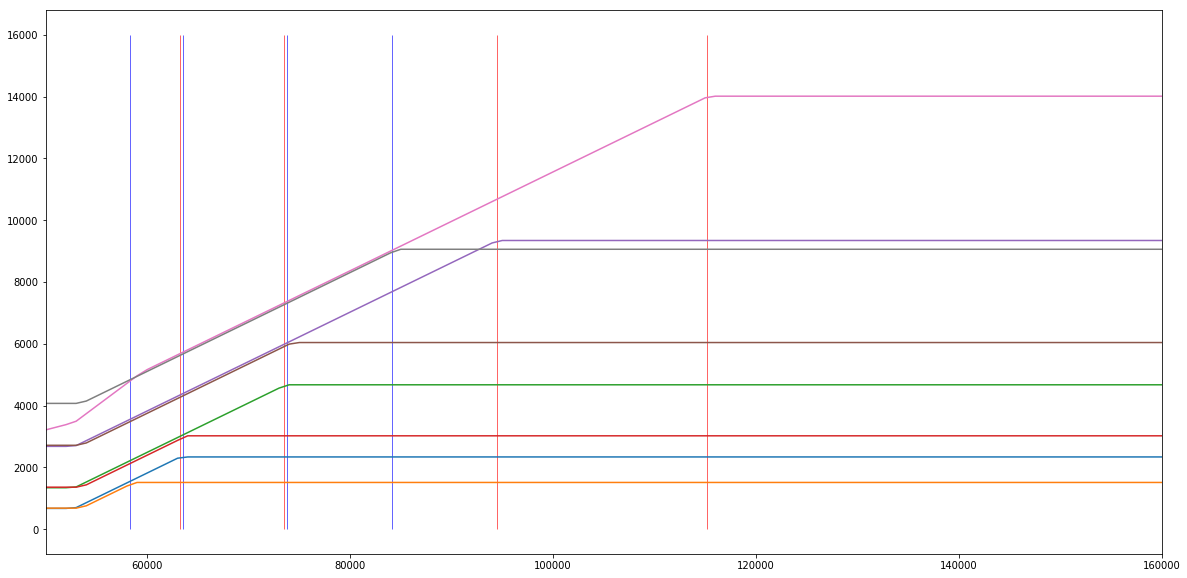

In [14]:



plt.figure(figsize=(20,10))
for child in range(1,5):
    plt.plot( pd.Series(range(0,2*10**5, 1000)),dict_gain_ir_2011_by_child[child])
    plt.plot( pd.Series(range(0,2*10**5, 1000)),dict_gain_ir_2014_by_child[child])
for thrsh in threshold_byr_rbg["2011"][0:4]:
    plt.vlines(thrsh, 0 , 16000, linewidth = 0.6, color = "r")
for thrsh in threshold_byr_rbg["2014"][0:4]:
    plt.vlines(thrsh, 0 , 16000, linewidth = 0.6, color = "b")
plt.xlim(50000,160000)

In [15]:
parts_fiscales_enfants = ir_2014.parts_fiscales_enfants(df.NBPAC_2011)

In [16]:
df["Irpp_2011"] = ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2011, parts_fiscales_enfants)
df["Irpp_2014"] = ir_2014.ir_avec_plafond_qf_enfant(df.Rbg_2014, parts_fiscales_enfants)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2016\Program\Program_only_married_couples\Irpp_formulas\IRPP_from_scratch_civil_union_2011.py:24: RuntimeWarning: invalid value encountered in minimum
  a = np.maximum(np.minimum(base1, thresholds1[:, 1:]) - thresholds1[:, :-1], 0)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2016\Program\Program_only_married_couples\Irpp_formulas\IRPP_from_scratch_civil_union_2011.py:24: RuntimeWarning: invalid value encountered in maximum
  a = np.maximum(np.minimum(base1, thresholds1[:, 1:]) - thresholds1[:, :-1], 0)


In [17]:
store_path = 'C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Data/hdf/edp_2016_final.h5'

In [18]:
fisc_rev_all_year = pd.DataFrame()

In [19]:
fisc_revenu_2012 = pd.read_hdf( store_path,"FISC_REVENU_{}".format(year+1) )

In [20]:
# fisc_revenu_year = pd.read_hdf( store_path,"FISC_REVENU_{}".format(year+1) )
# fisc_rev_temp = fisc_revenu_20_year.set_index("ID_FISC_LOG_DIFF")
# fisc_rev_all_year["NBPAC_2012"] = fisc_rev_temp.NBPAC

In [21]:
%%time
for year in range(2010,2016):
    fisc_revenu_year = pd.read_hdf( store_path,"FISC_REVENU_{}".format(year+1) )
    fisc_rev_temp = fisc_revenu_year.set_index("ID_FISC_LOG_DIFF")
    fisc_rev_all_year["NBPAC_{}".format(year)] = fisc_rev_temp.NBPAC

Wall time: 43.5 s


In [22]:
%%time
merge = pd.merge(df, fisc_rev_all_year.reset_index(), on = "ID_FISC_LOG_DIFF", suffixes=("", "_x"))

Wall time: 25.4 s


In [23]:
df = merge

In [24]:
df2 = df[df["NBPAC_2010"]<=df["NBPAC_2015"]]

Number of births

In [25]:
for year in range(2010,2015):
    print((df2["NBPAC_{}".format(year+1)]  - df2["NBPAC_{}".format(year)]).sum())

22351.5
18186.5
13357.5
8865.5
11563.5


In [26]:
for year in range(2010,2015):
    print((df2["NBPAC_{}".format(year+1)]  - df2["NBPAC_{}".format(2010)]).sum())

22351.5
40405.0
54138.5
63862.5
75426.0


In [27]:
for year in range(2010,2015):
    df2["Delta_child_2010_{}".format(year+1)] =df2["NBPAC_{}".format(year+1)]  - df2["NBPAC_{}".format(2010)]

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
df2[["NBPAC_{}".format(year) for year in range(2010,2016)]]

,NBPAC_2010,NBPAC_2011,NBPAC_2012,NBPAC_2013,NBPAC_2014,NBPAC_2015
0,3.0,3.0,3.0,3.0,3.0,3.0
2,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,2.0,2.0
4,2.0,2.0,2.0,2.0,2.0,2.0
5,2.0,2.0,2.0,2.0,2.0,2.0
6,3.0,3.0,3.0,3.0,3.0,3.0
7,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,2.0,2.0,2.0,2.0,2.0
10,3.0,3.0,3.0,3.0,3.0,3.0


In [29]:
df = df2

In [ ]:
merge.head()

In [31]:
fisc_rev_all_year["NBPAC_2012"] = fisc_rev_temp.NBPAC

In [32]:
fisc_revenu_2012.NBPAC.value_counts()

0.0     1198781
2.0      507785
1.0      434351
3.0      219721
4.0       61034
5.0       17050
0.5       12404
1.5        9911
6.0        6726
2.5        3957
7.0        2199
3.5        1264
8.0        1231
9.0         534
4.5         447
10.0        354
11.0        175
12.0        147
5.5         135
13.0         94
14.0         79
6.5          62
15.0         40
16.0         36
7.5          33
17.0         29
18.0         19
8.5          15
19.0         15
9.5          11
21.0          8
20.0          7
22.0          7
10.5          6
24.0          6
27.0          4
23.0          4
31.0          4
Name: NBPAC, dtype: int64

(271657, 269)


(0, 15000)

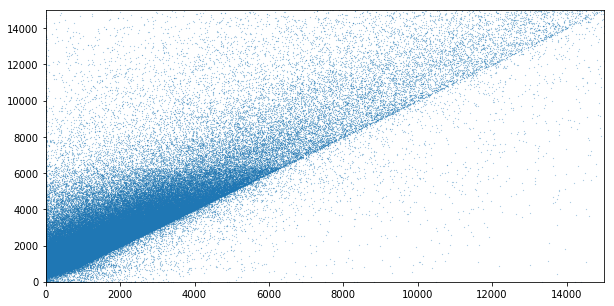

In [33]:
df_temp = df.query("(NBPAC_2011 >=1) & (NBPAC_2011==NBPAC_2014) ")
print(df_temp.shape)
fig = plt.figure(figsize=(10,5))
plt.scatter(df_temp.ZIMPOM_2011,df_temp.Irpp_2011, s=0.02 )
plt.xlim(0,15000)
plt.ylim(0,15000)

(299953, 269)


(0, 15000)

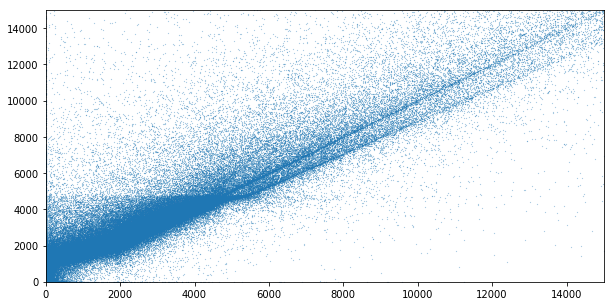

In [34]:
df_temp = df.query("(NBPAC_2011 ==0) & (NBPAC_2011==NBPAC_2014) ")
print(df_temp.shape)
fig = plt.figure(figsize=(10,5))
plt.scatter(df_temp.ZIMPOM_DECL_2014,df_temp.Irpp_2014, s=0.02 )
plt.xlim(0,15000)
plt.ylim(0,15000)

(271657, 269)


(0, 15000)

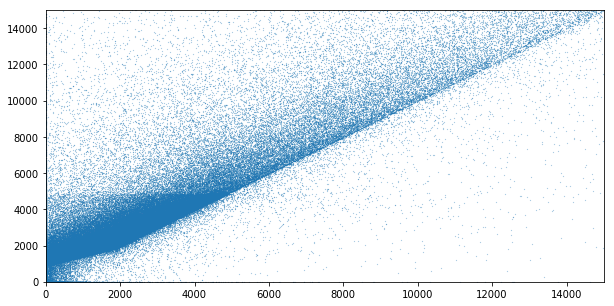

In [35]:
df_temp = df.query("(NBPAC_2011 >=1) & (NBPAC_2011==NBPAC_2014) ")
print(df_temp.shape)
fig = plt.figure(figsize=(10,5))
plt.scatter(df_temp.ZIMPOM_DECL_2014,df_temp.Irpp_2014, s=0.02 )
plt.xlim(0,15000)
plt.ylim(0,15000)

(271657, 269)


(0, 15000)

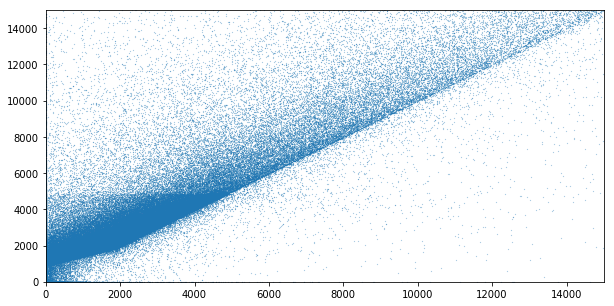

In [36]:
df_temp = df.query("(NBPAC_2011 >=1) & (NBPAC_2011==NBPAC_2014) ")
print(df_temp.shape)
fig = plt.figure(figsize=(10,5))
plt.scatter(df_temp.ZIMPOM_DECL_2014,df_temp.Irpp_2014, s=0.02 )
plt.xlim(0,15000)
plt.ylim(0,15000)

## Needed variables

In [37]:
nb_enf_max_for_annalysis = 6

In [38]:
threshold_byr_rbg = pd.DataFrame()
threshold_byr_rbg["2011"] = pd.Series([63233,73516,94451,115185,135941,150684])
threshold_byr_rbg["2014"] = pd.Series([58291,63530,73806,84103,94368,104633])

In [39]:
child_bool_list = ["child_{}".format(child) for child in  np.arange(1,nb_enf_max_for_annalysis+1)]
cumulative_child_bool_list = ["cumulative_child_{}".format(child) for child in  np.arange(1,nb_enf_max_for_annalysis+1)] 

In [40]:
for child in range(0,7):
    df["child_{}".format(child)] = df.NBPAC_2011 == child

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
all_thresholds = pd.concat([threshold_byr_rbg["2011"], threshold_byr_rbg["2014"]]).sort_values()
thrsh_bool_list = ["Threshold_{}".format(thrsh) for thrsh in  all_thresholds ]

In [42]:
for thrsh in all_thresholds:
    df["Threshold_{}".format(thrsh)] = df.Rbg_2011>= thrsh

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
between_threshold_for_child_rank = ["Between_threshold_{}_child".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]
over_threshold_for_child_rank = ["Over_threshold_{}_child".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]
children_number =  ["child_{}".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]

interaction_child_between_threshold  = ["{}:{}".format(child,interaction) for child, interaction in zip(children_number, between_threshold_for_child_rank)]
interaction_child_over_threshold  = ["{}:{}".format(child,interaction) for child, interaction in zip(children_number, over_threshold_for_child_rank)]

In [44]:
for nb_enf in range(1,7): ### in modification
    df["Between_threshold_{}_child".format(nb_enf)
          ] = ((df.Rbg_2011>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
               & (df.Rbg_2011< threshold_byr_rbg["2011"].iloc[nb_enf-1]))


C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [45]:

for nb_enf in range(1,7): ### in modification
    df["Over_threshold_{}_child".format(nb_enf)
          ] =  (df.Rbg_2011 > threshold_byr_rbg["2011"].iloc[nb_enf-1])
for nb_enf in range(1,7): ### in modification
    df["Below_thresholds_{}_child".format(nb_enf)
          ] =  (df.Rbg_2014 < threshold_byr_rbg["2011"].iloc[nb_enf-1])

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [46]:
df["Over_threshold"] = False
df["Between_thresholds"] = False
for child in range(1,7): ### in modification
    df["Over_threshold"] +=  (df["Over_threshold_{}_child".format(child)] & (df["NBPAC_2011"] ==child))
    df["Between_thresholds"] +=  (df["Between_threshold_{}_child".format(child)] & (df["NBPAC_2011"] ==child))

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: e

In [47]:
## Interactions hardcoded
for child in range(1,7):
    df["Over_{}_X_{}_child".format(child,child)] = df["Over_threshold_{}_child".format(child)] * df["child_{}".format(child)]
    df["Between_{}_X_{}_child".format(child,child)] = df["Between_threshold_{}_child".format(child)] * df["child_{}".format(child)]

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [48]:
## Interactions hardcoded
for child in range(1,6):
    df["Over_{}_X_{}_child".format(child+1,child)] = df["Over_threshold_{}_child".format(child+1)] * df["child_{}".format(child)]
    df["Between_{}_X_{}_child".format(child+1,child)] = df["Between_threshold_{}_child".format(child+1)] * df["child_{}".format(child)]

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [49]:
hardcoded_over = ["Over_{}_X_{}_child".format(child,child) for child in range(1,7)]
hardcoded_between = ["Between_{}_X_{}_child".format(child,child) for child in range(1,7)]

In [50]:
hardcoded_over_plus_1 = ["Over_{}_X_{}_child".format(child+1,child) for child in range(1,6)]
hardcoded_between_plus_1 = ["Between_{}_X_{}_child".format(child+1,child) for child in range(1,6)]

In [51]:
df["Intercept"] = 1 
df["Rbg_splines"]  = pd.cut(df.Rbg_2011, 100)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
threshold_byr_rbg

,2011,2014
0,63233,58291
1,73516,63530
2,94451,73806
3,115185,84103
4,135941,94368
5,150684,104633


In [53]:
interactions_rbg_between = ["Interactions_rbg_child{}_between".format(child) for child in range(1,7)]
interactions_rbg_over = ["Interactions_rbg_child{}_over".format(child) for child in range(1,7)]
interactions_child_over = ["Interactions_child{}_over".format(child) for child in range(1,7)]




df["Interactions_rbg_child1_between"] = df.eval("Delta_rbg*child_1*Between_threshold_1_child")
df["Interactions_rbg_child2_between"] = df.eval("Delta_rbg*child_2*Between_threshold_2_child")
df["Interactions_rbg_child3_between"] = df.eval("Delta_rbg*child_3*Between_threshold_3_child")
df["Interactions_rbg_child4_between"] = df.eval("Delta_rbg*child_4*Between_threshold_4_child")
df["Interactions_rbg_child5_between"] = df.eval("Delta_rbg*child_5*Between_threshold_5_child")
df["Interactions_rbg_child6_between"] = df.eval("Delta_rbg*child_6*Between_threshold_6_child")



df["Interactions_rbg_child1_over"] = df.eval("Delta_rbg*child_1*Over_threshold_1_child")
df["Interactions_rbg_child2_over"] = df.eval("Delta_rbg*child_2*Over_threshold_2_child")
df["Interactions_rbg_child3_over"] = df.eval("Delta_rbg*child_3*Over_threshold_3_child")
df["Interactions_rbg_child4_over"] = df.eval("Delta_rbg*child_4*Over_threshold_4_child")
df["Interactions_rbg_child5_over"] = df.eval("Delta_rbg*child_5*Over_threshold_5_child")
df["Interactions_rbg_child6_over"] = df.eval("Delta_rbg*child_6*Over_threshold_6_child")


df["Interactions_child1_over"] = (df["child_1"]* df["Over_threshold_1_child"]).astype("int")
df["Interactions_child2_over"] = (df["child_2"]* df["Over_threshold_2_child"]).astype("int")
df["Interactions_child3_over"] = (df["child_3"]* df["Over_threshold_3_child"]).astype("int")
df["Interactions_child4_over"] = (df["child_4"]* df["Over_threshold_4_child"]).astype("int")
df["Interactions_child5_over"] = (df["child_5"]* df["Over_threshold_5_child"]).astype("int")
df["Interactions_child6_over"] = (df["child_6"]* df["Over_threshold_6_child"]).astype("int")





df["Not_touched_by_reform"] = (df.NBPAC_2011 == 0).astype("int")
for nb_enf in range(1,7): ### in modification
    df["Not_touched_by_reform".format(nb_enf)
          ] +=((df.Rbg_2011<  threshold_byr_rbg["2014"].iloc[nb_enf-1])
                *( df.NBPAC_2011 == nb_enf)).astype("float")

df["Delta_Rbg_times_not_touched_reform"] = df.Not_touched_by_reform * df.Delta_rbg

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set 

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Income sample selection

In [54]:
df.shape

(614394, 352)

In [55]:
# #Nouvelle version ou il faut appartenir à l'intervalle de revenu que sur un seule des deux années
# df = df[(
#             (df.Rbg_2011>0)
#         )&(df.Rbg_2014>0)]

In [56]:
df.shape

(614394, 352)

In [57]:
df_save = df

In [58]:
df = df_save

In [59]:
df_save.shape

(614394, 352)

In [60]:
## On vire les variations extrèmes à 1%

In [61]:
low = 0.025
high = 0.975
quant_df = df.Delta_Rbg.quantile([low,high])
print(quant_df)
df = df[df.Delta_Rbg>quant_df.loc[low]]
df = df[df.Delta_Rbg<quant_df.loc[high]]

0.025   -20489.92
0.975    26914.36
Name: Delta_Rbg, dtype: float64


In [62]:
print(df.Rbg_2011.min())
print(df.Rbg_2014.min())
print(df.Rbg_2011.max())
print(df.Rbg_2014.max())


-128137.0
-112141.0
1571291.8
1569883.8


In [63]:
print((df.Rbg_2011<=1000).value_counts())
print((df.Rbg_2014<=1000).value_counts())

False    573916
True       3403
Name: Rbg_2011, dtype: int64
False    574070
True       3249
Name: Rbg_2014, dtype: int64


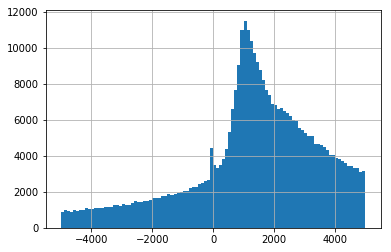

In [64]:
df.query("-5000<Delta_Rbg<5000").Delta_Rbg.hist(bins = 100)

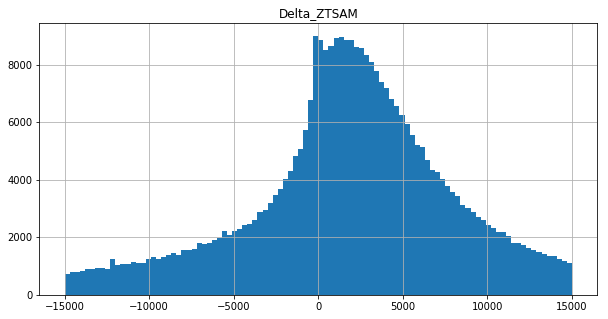

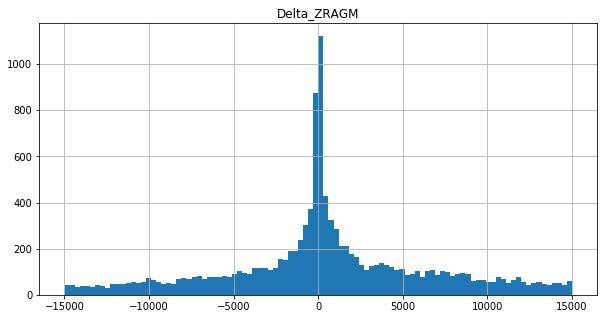

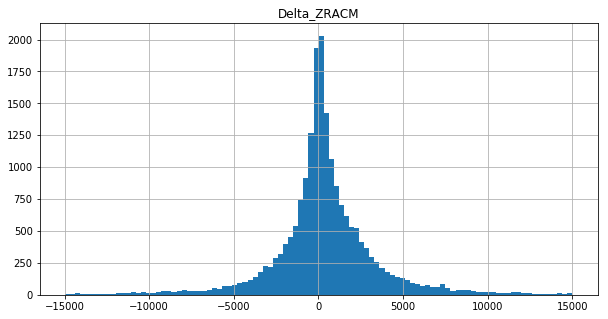

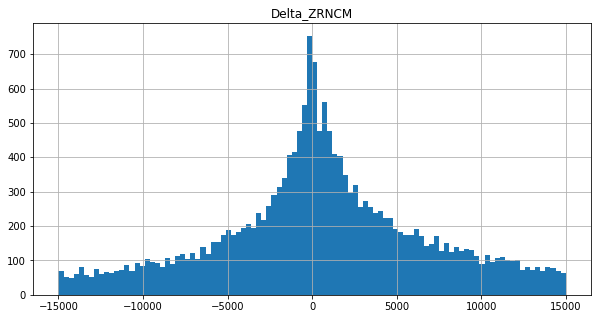

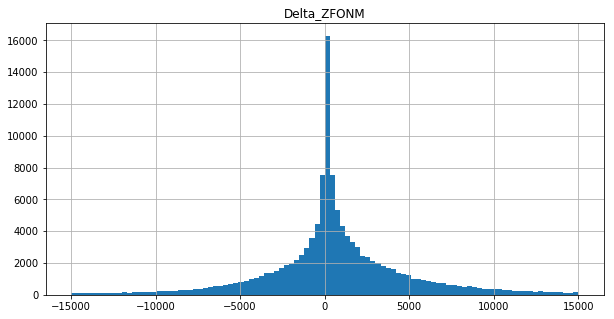

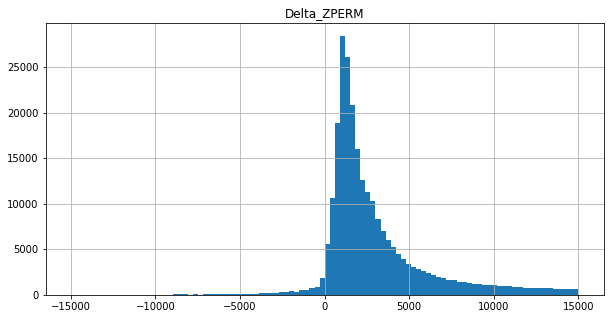

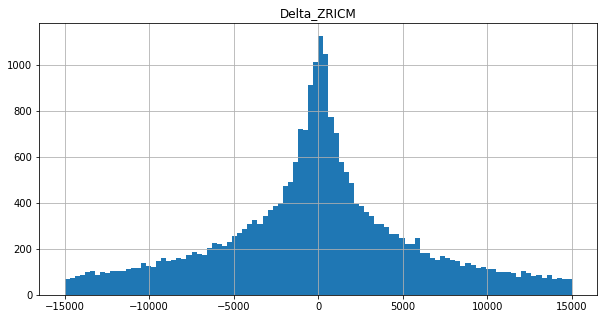

In [65]:
for var in household_income_vars:
    plt.figure(figsize=(10,5))
    df.query("(-15000<Delta_{}<15000) &(Delta_{}!=0)".format(var, var))["Delta_{}".format(var)].hist(bins = 100)
    plt.title("Delta_{}".format(var))

Text(0.5,1,'Delta_ZPERM')

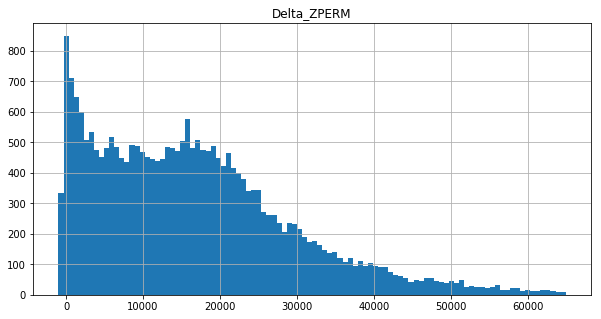

In [66]:
var = "ZPERM"
plt.figure(figsize=(10,5))
df.query("(-15000<Delta_{}<65000) &(Delta_{}!=0)&(ZPERM_2011<1000)".format(var, var))["Delta_{}".format(var)].hist(bins = 100)
plt.title("Delta_{}".format(var))

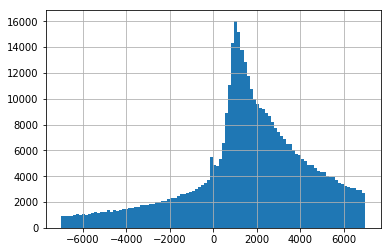

In [67]:
df.query("-7000<Delta_Rbg<7000").Delta_Rbg.hist(bins = 100)

In [68]:
(df.ZPERM_2014>0).value_counts(normalize = True)

False    0.526227
True     0.473773
Name: ZPERM_2014, dtype: float64

We have 28% of the sample that has retirement income. It creates a mass in the change in income at 2000 euros.

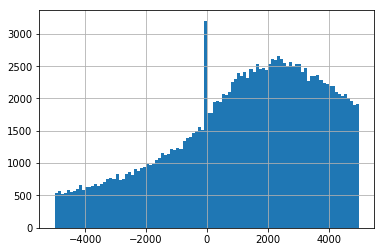

In [69]:
df.query("(-5000<Delta_Rbg<5000)&(ZPERM_2014<50)").Delta_Rbg.hist(bins = 100)

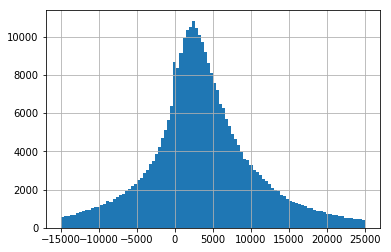

In [70]:
df.query("(-15000<Delta_Rbg<25000)&(ZPERM_2011<50)").Delta_Rbg.hist(bins = 100)

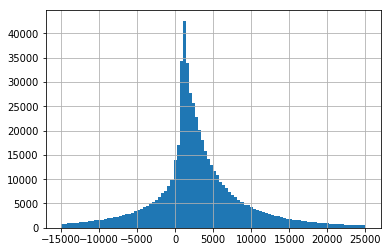

In [71]:
df.query("(-15000<Delta_Rbg<25000)").Delta_Rbg.hist(bins = 100)

In [72]:
(df.Rbg_2014==0).value_counts()

False    574957
True       2362
Name: Rbg_2014, dtype: int64

In [73]:
df.query("NBPAC_2011<5").shape

(574783, 352)

In [74]:
df["Delta_NBPAC"] = df.NBPAC_2014 - df.NBPAC_2011

In [75]:
(df.Delta_NBPAC!=0).value_counts(normalize = True)

False    0.931799
True     0.068201
Name: Delta_NBPAC, dtype: float64

15% has experienced a birth or a child departure over the 2011,2014 period.  
We will focus our analysis only on households with a fixed family structure.

In [76]:
df.shape

(577319, 353)

In [77]:
df[df.NBPAC_2011 == df.NBPAC_2014].shape

(537945, 353)

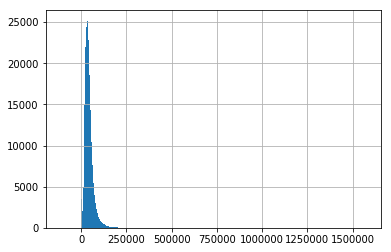

In [78]:
df.Rbg_2014.hist(bins = 900)

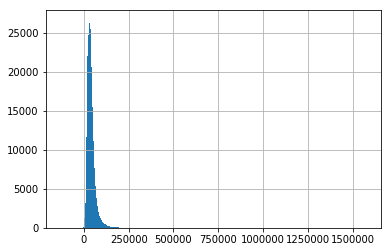

In [79]:

df.Rbg_2011.hist(bins = 900)

In [80]:
print((df.Rbg_2011 == 0).value_counts(normalize = True))
print((df.Rbg_2014 == 0).value_counts(normalize = True))

False    0.995782
True     0.004218
Name: Rbg_2011, dtype: float64
False    0.995909
True     0.004091
Name: Rbg_2014, dtype: float64


### Virer les infertiles

In [81]:
print(((df.Age_mother>70)|(df.Age_father>70)).value_counts()) #on passe à 170894 au liey de 197728
#print ((df.Age_wo<75)&(df.Age_me<75)).value_counts()

False    469900
True     107419
dtype: int64


In [82]:
df = df[~((df.Age_mother>42)|(df.Age_father>70))]

In [83]:
df.shape

(221103, 353)

In [84]:
#df[["Age_mother", "Age_father"]]

In [85]:
#df = df[(df.Age_mother<70)&(df.Age_father<70)]

In [86]:
df.shape

(221103, 353)

In [87]:
range(nb_enf_max_for_annalysis+1)

range(0, 7)

In [88]:
%%time
df = df[df.NBPAC_2011.isin(range(nb_enf_max_for_annalysis+1))]#,6,7])]
#reg_df = reg_df[reg_df.AGERF_2011<50]

Wall time: 352 ms


In [89]:
df.shape

(221100, 353)

In [90]:
reg_df =df

In [91]:
import statsmodels.api as sm
reg_df["Rbg_splines"]  = pd.cut(reg_df.Rbg_2011, 10)

In [92]:
threshold_byr_rbg = pd.DataFrame()
threshold_byr_rbg["2011"] = pd.Series([63233,73516,94451,115185,135941,150684])
threshold_byr_rbg["2014"] = pd.Series([58291,63530,73806,84103,94368,104633])
threshold_byr_rbg.index = range(1,7); threshold_byr_rbg.index.name = 'nb_enf'
threshold_byr_rbg




reg_df_same_NBPAC["Not_touched_by_reform"] = (reg_df_same_NBPAC.NBPAC_2011 == 0).astype("int")
for nb_enf in range(1,7): ### in modification
    reg_df_same_NBPAC["Not_touched_by_reform".format(nb_enf)
          ] +=((reg_df_same_NBPAC.Rbg_2011<  threshold_byr_rbg["2014"].iloc[nb_enf-1])
                *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")

NameError: name 'reg_df_same_NBPAC' is not defined

In [ ]:
reg_df_same_NBPAC["Distance_to_treatment_2"]  = 0
for child in range(1,7):
    reg_df_same_NBPAC["Distance_to_treatment_2"] += reg_df_same_NBPAC["Over_threshold_{}_child".format(child)] * reg_df_same_NBPAC[child_bool_list[child-1]] * ((threshold_byr_rbg["2011"].iloc[child-1]) - reg_df_same_NBPAC.Rbg_2014)

In [ ]:
reg_df_same_NBPAC.Not_touched_by_reform.value_counts()

In [93]:
df_desc_stat = pd.DataFrame()

for child in  range(0, nb_enf_max_for_annalysis+1):
        df_desc_stat.loc[child, "Treatment_0"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Not_touched_by_reform".format(child)].value_counts()[True]


for child in  range(1, nb_enf_max_for_annalysis+1):
    df_desc_stat.loc[child, "Treatment_1"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Between_threshold_{}_child".format(child)].value_counts()[True]
    df_desc_stat.loc[child, "Treatment_2"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Over_threshold_{}_child".format(child)].value_counts()[True]
df_desc_stat["Total"] = df_desc_stat.sum(axis = 1)
df_desc_stat.loc["Total"] = df_desc_stat.sum(axis = 0)

NameError: name 'reg_df_same_NBPAC' is not defined

In [ ]:
df_desc_stat

#### Still in the same treatment span

In [ ]:

reg_df_same_NBPAC["Rbg2014_below_threshold_{}_child".format(0)
          ] =  True
for nb_enf in range(1,7): ### in modification
    reg_df_same_NBPAC["Rbg2014_Over_threshold_{}_child".format(nb_enf)
          ] =  (reg_df_same_NBPAC.Rbg_2014 > threshold_byr_rbg["2011"].iloc[nb_enf-1])
    reg_df_same_NBPAC["Rbg2014_Between_threshold_{}_child".format(nb_enf)
          ] =  (reg_df_same_NBPAC.Rbg_2014 > threshold_byr_rbg["2014"].iloc[nb_enf-1]) & (reg_df_same_NBPAC.Rbg_2014 < threshold_byr_rbg["2011"].iloc[nb_enf-1])
    reg_df_same_NBPAC["Rbg2014_below_threshold_{}_child".format(nb_enf)
          ] =  (reg_df_same_NBPAC.Rbg_2014 < threshold_byr_rbg["2014"].iloc[nb_enf-1])



In [ ]:
df_desc_stat_2014 = pd.DataFrame()

for child in  [0]:
        df_desc_stat_2014.loc[child, "Treatment_0"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_below_threshold_{}_child".format(child)].value_counts()[True]



for child in  range(1, nb_enf_max_for_annalysis+1):
    df_desc_stat_2014.loc[child, "Treatment_1"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_Between_threshold_{}_child".format(child)].value_counts()[True]
    df_desc_stat_2014.loc[child, "Treatment_2"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_Over_threshold_{}_child".format(child)].value_counts()[True]
    
    df_desc_stat_2014.loc[child, "Treatment_0"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_below_threshold_{}_child".format(child)].value_counts()[True]
    
    
    
df_desc_stat_2014["Total"] = df_desc_stat_2014.sum(axis = 1)

#### Transitions 

In [ ]:
df_desc_stat = pd.DataFrame()

for child in  [0]:
    df_desc_stat.loc[child, "Treatment_0"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_below_threshold_{}_child".format(child)].value_counts()[True]



for child in  range(1, nb_enf_max_for_annalysis+1):
    df_desc_stat.loc[child, "Treatment_1"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_Between_threshold_{}_child".format(child)].value_counts()[True]
    df_desc_stat.loc[child, "Treatment_2"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_Over_threshold_{}_child".format(child)].value_counts()[True]
    
    df_desc_stat.loc[child, "Treatment_0"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_below_threshold_{}_child".format(child)].value_counts()[True]
    
    
df_desc_stat["Total"] = df_desc_stat.sum(axis = 1)

In [ ]:
df_desc_stat

In [ ]:
df_temp_transition =reg_df_same_NBPAC

In [ ]:
df_temp_transition["Treatment_0_2014"] = False * reg_df_same_NBPAC.shape[0]
df_temp_transition["Treatment_0_2011"] = False * reg_df_same_NBPAC.shape[0]


df_temp_transition["Treatment_1_2014"] = False * reg_df_same_NBPAC.shape[0]
df_temp_transition["Treatment_1_2011"] = False * reg_df_same_NBPAC.shape[0]

df_temp_transition["Treatment_2_2014"] = False * reg_df_same_NBPAC.shape[0]
df_temp_transition["Treatment_2_2011"] = False * reg_df_same_NBPAC.shape[0]



for child in range(1,7):
    df_temp_transition["Treatment_1_2014"] += (reg_df_same_NBPAC.NBPAC_2011 == child) * reg_df_same_NBPAC["Rbg2014_Between_threshold_{}_child".format(child)]
    df_temp_transition["Treatment_1_2011"] += (reg_df_same_NBPAC.NBPAC_2011 == child) * reg_df_same_NBPAC["Between_threshold_{}_child".format(child)]
    
    df_temp_transition["Treatment_2_2014"] += (reg_df_same_NBPAC.NBPAC_2011 == child) * reg_df_same_NBPAC["Rbg2014_Over_threshold_{}_child".format(child)]
    df_temp_transition["Treatment_2_2011"] += (reg_df_same_NBPAC.NBPAC_2011 == child) * reg_df_same_NBPAC["Over_threshold_{}_child".format(child)]
    



df_temp_transition["Treatment_1_2011"] = df_temp_transition["Treatment_1_2011"].astype("bool")
df_temp_transition["Treatment_2_2011"] = df_temp_transition["Treatment_2_2011"].astype("bool")
df_temp_transition["Treatment_1_2014"] = df_temp_transition["Treatment_1_2014"].astype("bool")
df_temp_transition["Treatment_2_2014"] = df_temp_transition["Treatment_2_2014"].astype("bool")
df_temp_transition["Treatment_0_2011"] = ~(df_temp_transition.Treatment_1_2011 |df_temp_transition.Treatment_2_2011)
df_temp_transition["Treatment_0_2014"] = ~(df_temp_transition.Treatment_1_2014 |df_temp_transition.Treatment_2_2014)

In [ ]:
df_temp_transition.Treatment_0_2011.value_counts()

In [ ]:
df_temp_transition.shape

In [ ]:

print((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1])
print((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1])
print((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1])
print("*"*12)
print ((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1])
print ((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1])
print("*"*12)
print((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1])
print((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1])
print((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1])
print((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1])

In [ ]:

print ((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1]/df_temp_transition.shape[0])
print("*"*12)
print ((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1]/df_temp_transition.shape[0])
print("*"*12)
print ((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1]/df_temp_transition.shape[0])

In [ ]:
df_desc_transition = pd.DataFrame()
df_desc_transition.loc["Treatment_0","Treatment_0" ] = (df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_0_2014).value_counts()[True]
df_desc_transition.loc["Treatment_0","Treatment_1" ] = (df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_1_2014).value_counts()[True]
df_desc_transition.loc["Treatment_0","Treatment_2" ] = (df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_2_2014).value_counts()[True]



df_desc_transition.loc["Treatment_1","Treatment_0" ] = (df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_0_2014).value_counts()[True]
df_desc_transition.loc["Treatment_1","Treatment_1" ] = (df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_1_2014).value_counts()[True]
df_desc_transition.loc["Treatment_1","Treatment_2" ] = (df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_2_2014).value_counts()[True]



df_desc_transition.loc["Treatment_2","Treatment_0" ] = (df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_0_2014).value_counts()[True]
df_desc_transition.loc["Treatment_2","Treatment_1" ] = (df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_1_2014).value_counts()[True]
df_desc_transition.loc["Treatment_2","Treatment_2" ] = (df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_2_2014).value_counts()[True]


display(df_desc_transition)
display(df_desc_transition/df_temp_transition.shape[0])




In [ ]:
for nb_child in range(0,7):
    df_desc_transition = pd.DataFrame()
    df_temp = df_temp_transition.query("(NBPAC_2011==NBPAC_2014)& (NBPAC_2011 ==@nb_child)")
    df_desc_transition.loc["Treatment_0","Treatment_0" ] = (df_temp.Treatment_0_2011 * df_temp.Treatment_0_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_0","Treatment_1" ] = (df_temp.Treatment_0_2011 * df_temp.Treatment_1_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_0","Treatment_2" ] = (df_temp.Treatment_0_2011 * df_temp.Treatment_2_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_1","Treatment_0" ] = (df_temp.Treatment_1_2011 * df_temp.Treatment_0_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_1","Treatment_1" ] = (df_temp.Treatment_1_2011 * df_temp.Treatment_1_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_1","Treatment_2" ] = (df_temp.Treatment_1_2011 * df_temp.Treatment_2_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_2","Treatment_0" ] = (df_temp.Treatment_2_2011 * df_temp.Treatment_0_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_2","Treatment_1" ] = (df_temp.Treatment_2_2011 * df_temp.Treatment_1_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_2","Treatment_2" ] = (df_temp.Treatment_2_2011 * df_temp.Treatment_2_2014).sum(axis=0)

    print("*"*9+"{} child".format(nb_child)+"*"*9)
    print("Headcount")
    display(df_desc_transition)
    print("Share")
    display(df_desc_transition/df_temp.shape[0])




In [ ]:
#Transitions by number of children.
# for child in range(1,7): 
#     print  "*"*22 + "{}".format(child)
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_1_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_1_2014).value_counts()[1]
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_2_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_2_2014).value_counts()[1]
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_0_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_0_2014).value_counts()[1]
#     print"*"*12
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_1_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_2_2014).value_counts()[1]
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_2_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_1_2014).value_counts()[1]
#     print"*"*12
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_0_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_1_2014).value_counts()[1]
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_0_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_2_2014).value_counts()[1]
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_1_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_0_2014).value_counts()[1]
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_2_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_0_2014).value_counts()[1]

In [ ]:
((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_0_2014)
                                               +(df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_1_2014)
                                               +(df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_2_2014)).value_counts(normalize = True)

In [ ]:
reg_df_same_NBPAC["Stays_in_same_treatment"]= ((df_temp_transition.Treatment_0_2011 & df_temp_transition.Treatment_0_2014)
                                               +(df_temp_transition.Treatment_1_2011 & df_temp_transition.Treatment_1_2014)
                                               +(df_temp_transition.Treatment_2_2011 & df_temp_transition.Treatment_2_2014))

In [ ]:
df["Stays_in_same_treatment"]= ((df_temp_transition.Treatment_0_2011 & df_temp_transition.Treatment_0_2014)
                                               +(df_temp_transition.Treatment_1_2011 & df_temp_transition.Treatment_1_2014)
                                               +(df_temp_transition.Treatment_2_2011 & df_temp_transition.Treatment_2_2014))

In [ ]:
reg_df_same_NBPAC[["NBPAC_2011","Rbg_2011","Treatment_0_2011", "Rbg_2014","Treatment_0_2014"]].head()

In [ ]:
print(reg_df_same_NBPAC.Stays_in_same_treatment.value_counts(normalize = True))
print(reg_df_same_NBPAC.query("NBPAC_2011>0").Stays_in_same_treatment.value_counts(normalize = True))
print(reg_df_same_NBPAC[~reg_df_same_NBPAC.Treatment_0_2011].Stays_in_same_treatment.value_counts(normalize = True))

In [ ]:
threshold_byr_rbg

In [ ]:
#df_hello[(df_hello.Treatment_0_2011 * df_hello.Treatment_0_2014) ==1][["Rbg_2011", "Rbg_2014", "NBPAC_2011"]].value_counts()

In [ ]:
pd.crosstab(reg_df_same_NBPAC["NBPAC_2011"], reg_df_same_NBPAC["Rbg2014_Between_threshold_1_child"])

In [ ]:
#reg_df_same_NBPAC[["Age_Elder_child","Age_Youngest_child"]]

### Common trend assumption

In [ ]:
reg_df_same_NBPAC.query("-50000<Delta_Rbg<50000").Delta_Rbg.hist(bins = 100)

In [ ]:
import seaborn as sns

We see that there is something not very smoooth happenning for households without children:

In [ ]:
for child in range(0,6):
    sns.distplot(reg_df_same_NBPAC.query("(-50000<Delta_rbg<50000)&(NBPAC_2011=={})".format(child)).Delta_rbg, hist= False, label = child)
plt.xlim(-10000,20000)

In [ ]:
reg_df_same_NBPAC.shape

In [ ]:

reg_df_same_NBPAC = reg_df_same_NBPAC.query("(ZPERM_2014==0)&(ZPERM_2011==0)")

In [ ]:
reg_df_same_NBPAC.shape

When getting rid of households with an income tax equal to 0 in 2014, the curve is a lot smoother.
The average change in taxable income is way nearer to the average change for one children than the one we observe when we take out the households which does not have retirement income.

In [ ]:
for child in range(0,6):
    sns.distplot(reg_df_same_NBPAC.query("(-50000<Delta_rbg<50000)&(NBPAC_2011=={})& (ZPERM_2014==0)".format(child)).Delta_rbg, hist= False, label = child)
plt.xlim(-10000,20000)

In [ ]:
threshold_byr_rbg

In [ ]:
for child in range(0,7):
    reg_df["child_{}".format(child)] = reg_df.NBPAC_2011 == child

In [ ]:
print(reg_df.query("NBPAC_2011==0").Delta_Rbg.mean())
print(reg_df.query("child_1==True").Delta_Rbg.mean())
print(reg_df.query("child_2==True").Delta_Rbg.mean())
print(reg_df.query("child_3==True").Delta_Rbg.mean())
print(reg_df.query("child_4==True").Delta_Rbg.mean())
print(reg_df.query("child_5==True").Delta_Rbg.mean())
print(reg_df.query("child_6==True").Delta_Rbg.mean())

In [ ]:

print(reg_df.query("(Between_threshold_1_child==True)").Delta_Rbg.mean())
print(reg_df.query("Between_threshold_2_child==True").Delta_Rbg.mean())
print(reg_df.query("Between_threshold_3_child==True").Delta_Rbg.mean())
print(reg_df.query("Between_threshold_4_child==True").Delta_Rbg.mean())
print(reg_df.query("Between_threshold_5_child==True").Delta_Rbg.mean())

In [ ]:
# print reg_df.query("(Between_threshold_1_child==True)&(child_1==True)").Delta_rbg.mean()
# print reg_df.query("(Between_threshold_1_child==True)&(child_2==True)").Delta_rbg.mean()
# print reg_df.query("(Between_threshold_1_child==True)&(child_3==True)").Delta_rbg.mean()
# print reg_df.query("(Between_threshold_1_child==True)&(child_4==True)").Delta_rbg.mean()
# print reg_df.query("(Between_threshold_1_child==True)&(child_5==True)").Delta_rbg.mean()

In [ ]:
# print reg_df.query("(Between_threshold_2_child==True)&(child_1==True)").Delta_rbg.mean()
# print reg_df.query("(Between_threshold_2_child==True)&(child_2==True)").Delta_rbg.mean()
# print reg_df.query("(Between_threshold_2_child==True)&(child_3==True)").Delta_rbg.mean()
# print reg_df.query("(Between_threshold_2_child==True)&(child_4==True)").Delta_rbg.mean()
# print reg_df.query("(Between_threshold_2_child==True)&(child_5==True)").Delta_rbg.mean()

In [ ]:
reg_df_same_NBPAC["child_0"] = reg_df.NBPAC_2011==0

In [ ]:
# for nb_child1 in range(1,7):
#     print reg_df_same_NBPAC.query("(child_{}==True)&(Between_threshold_2_child==True) ".format(nb_child1)).shape[0]


In [ ]:
# for nb_child1 in range(1,7):
#     for nb_child2 in range(0,7):
#         print(nb_child1, nb_child2,reg_df_same_NBPAC.query("(Between_threshold_{}_child==True)&(child_{}==True)".format(nb_child1,nb_child2)).Delta_rbg.mean(),
#              reg_df_same_NBPAC.query("(Between_threshold_{}_child==True)&(child_{}==True)".format(nb_child1,nb_child2)).Delta_rbg.shape[0])



In [ ]:
reg_df_same_NBPAC_delta_trimmed = reg_df_same_NBPAC.query("(-50000<Delta_rbg<50000)")

In [ ]:
# for nb_child1 in range(1,6):
#     for nb_child2 in range(0,6):
#         print nb_child1, nb_child2,reg_df_same_NBPAC_delta_trimmed.query("(Between_threshold_{}_child==True)&(child_{}==True)".format(nb_child1,nb_child2)).Delta_rbg.mean()



In [ ]:
# for nb_child1 in range(1,6):
#     for nb_child2 in range(0,6):
#         print nb_child1, nb_child2,reg_df_same_NBPAC_delta_trimmed.query("(Over_threshold_{}_child==True)&(child_{}==True)".format(nb_child1,nb_child2)).Delta_rbg.mean()



In [ ]:
reg_df_same_NBPAC.query("NBPAC_2011==3").Rbg_2011.hist(bins = 1000)


### Do households bunch ?

In 2011 ?

In [ ]:
nb_enf = 1
sns.distplot(reg_df_same_NBPAC.query("(NBPAC_2011=={}) & (60000<Rbg_2011<65000)".format(nb_enf)).Rbg_2011, hist = True, bins = 20)
plt.vlines(threshold_byr_rbg["2011"][nb_enf],0,0.00025, alpha = 0.2 )
plt.xlim(62000,64000)

In [ ]:
nb_enf = 1
sns.distplot(reg_df_same_NBPAC.query("(NBPAC_2011=={}) & (55000<Rbg_2014<64000)".format(nb_enf)).Rbg_2014, hist = True, bins = 30)
plt.vlines(threshold_byr_rbg["2014"][nb_enf],0,0.00025, alpha = 0.2 )
plt.xlim(56000,60000)

In [ ]:
nb_enf = 1
sns.distplot(reg_df_same_NBPAC.query("(NBPAC_2014=={}) & (54000<Rbg_2014<62000)".format(nb_enf)).Rbg_2014, hist = True, bins = 9)
plt.vlines(threshold_byr_rbg["2014"][nb_enf],0,0.00025, alpha = 0.2 )
plt.xlim(54000,62000)

In [ ]:
nb_enf = 2
sns.distplot(reg_df_same_NBPAC.query("(NBPAC_2011=={}) & (70000<Rbg_2011<80000)".format(nb_enf)).Rbg_2011, hist = True, bins = 30)
plt.vlines(threshold_byr_rbg["2011"][nb_enf],0,0.00025, alpha = 0.2 )
plt.xlim(72000,76000)
plt.ylim(0.00005, 0.00015)

In [ ]:
nb_enf = 3
sns.distplot(reg_df_same_NBPAC.query("(NBPAC_2011=={}) & (80000<Rbg_2011<110000)".format(nb_enf)).Rbg_2011, hist = True, bins = 31)
plt.vlines(threshold_byr_rbg["2011"][nb_enf],0,0.00025, alpha = 0.2 )
plt.xlim(90000,100000)
#plt.ylim(0.00005, 0.00015)

In [ ]:
nb_enf = 4
reg_df_same_NBPAC.query("(NBPAC_2011=={}) & (110000<Rbg_2011<120000)".format(nb_enf)).Rbg_2011.hist(bins = 15)
plt.vlines(threshold_byr_rbg["2011"][nb_enf],0,40, alpha = 0.2 )
#plt.xlim(90000,100000)
#plt.ylim(0.00005, 0.00015)

In [ ]:
sns.distplot(reg_df_same_NBPAC.query("(NBPAC_2014==3) & (50000<Rbg_2014<200000)").Rbg_2014)
plt.vlines(threshold_byr_rbg["2014"][6],0,0.000025, alpha = 0.2 )

In [ ]:
threshold_byr_rbg["2011"][3]

In [ ]:
(df_temp.NBPAC_2011==2).value_counts()

In [ ]:
(df_temp.query("NBPAC_2011==2")).shape

In [ ]:
df_temp.query("NBPAC_2011 == {}".format(child)).shape

## Double diff 

#### By rank of children

In [ ]:
condition_rbg = ("(50000<Rbg_2014<200000)|(50000<Rbg_2011<200000)")

In [ ]:
df_temp = df.query("NBPAC_2011==NBPAC_2014&"+condition_rbg)
for child in range(1,2):
    print(child)
    m = sm.RLM.from_formula("(Delta_rbg)~   {}  ".format(
            ' + '.join( #below_threshold_for_child_rank+interaction_child_below_thresholds
                      [between_threshold_for_child_rank[child-1]]+ [over_threshold_for_child_rank[child-1]]
                     ))
                                                                                            , df_temp.query("NBPAC_2011 == {}".format(child)))
    fit = m.fit()
    summary = fit.summary(); print(summary)

In [ ]:
df_temp = df.query("NBPAC_2011==NBPAC_2014&"+condition_rbg)
result_fit_list = list()
for child in range(1,7):
    m = sm.RLM.from_formula("(Delta_rbg)~   Over_threshold+ Between_thresholds" 
                     
                                                                                            , df_temp.query("NBPAC_2011 == {}".format(child)))
    fit = m.fit()
    result_fit_list.append(fit)
summary_col_result = summary_col(result_fit_list, stars = True)

In [ ]:

print(summary_col(result_fit_list,model_names =["{} children".format(nb_child) for nb_child in range(1,7)], stars = True))

#### Double diff with no child family as control

We take households above the 2013 their corresponding 2013 threshold (where the treatment begins).  
For each number of children we compare them to the households without children earning more than the 2013 threshold we are comparing the household to.   

E.g. For two children, we take all households earning more than 63530 that have 0 or two children, then we run the estimation with the two types of treatments (being between or over the thresholds).

In [ ]:
#Colinear if we put an intercept
df_temp = df.query("NBPAC_2011==NBPAC_2014&"+condition_rbg).dropna(subset = ["Delta_rbg", "Delta_Rbg"]+hardcoded_over+hardcoded_between+over_threshold_for_child_rank+between_threshold_for_child_rank)
for child in range(1,2):
    df_temp2 = df_temp.query("((NBPAC_2011 == {})|(NBPAC_2011 == 0))& (Rbg_2011>{})".format(child,threshold_byr_rbg.loc[child,"2014"]) )
    m = sm.OLS(df_temp2["Delta_Rbg"].astype("float"), df_temp2[[hardcoded_over[child-1],hardcoded_between[child-1],
                                          over_threshold_for_child_rank[child-1], between_threshold_for_child_rank[child-1]]].astype("float"))
    fit = m.fit()
    summary = fit.summary(); print(summary)

In [ ]:
df_temp = df.query("NBPAC_2011==NBPAC_2014&"+condition_rbg).dropna(subset = ["Delta_rbg", "Delta_Rbg"]+hardcoded_over+hardcoded_between+over_threshold_for_child_rank+between_threshold_for_child_rank)
result_fit_list = list()
for child in range(1,7):
    df_temp2 = df_temp.query("((NBPAC_2011 == {})|(NBPAC_2011 == 0))& (Rbg_2011>{})".format(child,threshold_byr_rbg.loc[child,"2014"]) )
    df_temp2["Between_X_child"] = df_temp2["Between_{}_X_{}_child".format(child,child)]
    df_temp2["Over_X_child"] = df_temp2["Over_{}_X_{}_child".format(child,child)]
    df_temp2["Between_threshold_n_child"] = df_temp2["Between_threshold_{}_child".format(child)]
    df_temp2["Over_threshold_n_child"] = df_temp2["Over_threshold_{}_child".format(child)]
    m = sm.OLS(df_temp2["Delta_Rbg"].astype("float"), df_temp2[["Between_X_child", "Over_X_child", "Intercept"]].astype("float"))
    fit = m.fit()
    result_fit_list.append(fit)
from statsmodels.iolib.summary2 import summary_col
print(summary_col(result_fit_list, stars = True))

In [ ]:
#Colinear if we put an intercept
df_temp = df.query("NBPAC_2011==NBPAC_2014&"+condition_rbg).dropna(subset = ["Delta_rbg", "Delta_Rbg"]+hardcoded_over+hardcoded_between+over_threshold_for_child_rank+between_threshold_for_child_rank)
result_fit_list = list()
for child in range(1,7):
    df_temp2 = df_temp.query("((NBPAC_2011 == {})|(NBPAC_2011 == 0))& (Rbg_2011>{})".format(child,threshold_byr_rbg.loc[child,"2014"]) )
    df_temp2["Between_X_child"] = df_temp2["Between_{}_X_{}_child".format(child,child)]
    df_temp2["Over_X_child"] = df_temp2["Over_{}_X_{}_child".format(child,child)]
    df_temp2["Between_threshold_n_child"] = df_temp2["Between_threshold_{}_child".format(child)]
    df_temp2["Over_threshold_n_child"] = df_temp2["Over_threshold_{}_child".format(child)]
    m = sm.OLS(df_temp2["Delta_Rbg"].astype("float"), df_temp2[["Between_X_child", "Over_X_child","Between_threshold_n_child","Over_threshold_n_child"]].astype("float"))
    fit = m.fit()
    result_fit_list.append(fit)
from statsmodels.iolib.summary2 import summary_col
print(summary_col(result_fit_list, stars = True))

In [ ]:
df_temp2.query("NBPAC_2011==0")[["Between_threshold_1_child"]].Between_threshold_1_child.value_counts()

In [ ]:
from statsmodels.iolib.summary2 import summary_col
print(summary_col(result_fit_list, stars = True))

In [ ]:
for child in [1]:
    to_keep_regressors = []
    child_rank_to_include = 0
    for liste in [between_threshold_for_child_rank, over_threshold_for_child_rank, children_number,interaction_child_between_threshold,interaction_child_over_threshold]:
        print(liste[child])
        to_keep_regressors.append(liste[child])

#### Double diff with no child family as control

In [ ]:
to_keep_regressors = []
child_rank_to_include = 0
df_temp = df.query("NBPAC_2011==NBPAC_2014")
for child in range(1,2):
    to_keep_regressors = []
    child_rank_to_include = 0
    for liste in [between_threshold_for_child_rank, over_threshold_for_child_rank, children_number,interaction_child_between_threshold,interaction_child_over_threshold]:
        to_keep_regressors.append(liste[child-1])
    m = sm.RLM.from_formula("(Delta_rbg)~   {}  ".format(
            ' + '.join( to_keep_regressors)), df_temp.query("(NBPAC_2011 == {})|(NBPAC_2011 == 0)".format(child)))
    fit = m.fit()
    summary = fit.summary(); print(summary)

In [ ]:
to_keep_regressors = []
child_rank_to_include = 0
df_temp = df.query("NBPAC_2011==NBPAC_2014")
for child in range(1,2):
    to_keep_regressors = []
    child_rank_to_include = 0
    for liste in [between_threshold_for_child_rank, over_threshold_for_child_rank, children_number,interaction_child_between_threshold,interaction_child_over_threshold]:
        to_keep_regressors.append(liste[child-1])
    m = sm.RLM.from_formula("(Delta_rbg)~   {}  ".format(
            ' + '.join( to_keep_regressors)), df_temp.query("(NBPAC_2011 == {})|(NBPAC_2011 == 0)".format(child)))
    fit = m.fit()
    summary = fit.summary(); print(summary)

In [ ]:
reg_df_same_NBPAC.query(
                                                                    "(NBPAC_2011 == {})".format(1)).child_1.value_counts()

In [ ]:
map(between_threshold_for_child_rank.__getitem__,(0,1,2))

In [ ]:
to_keep_regressors

In [ ]:
to_keep_regressors = []
child_rank_to_include = 0
for child in range(1,7):
    to_keep_regressors = []
    child_rank_to_include = 0
    for liste in [between_threshold_for_child_rank, over_threshold_for_child_rank]:
        to_keep_regressors.append(liste[child-1])
    m = sm.OLS.from_formula("(Delta_rbg)~   {} - child_{}".format(
            ' + '.join( to_keep_regressors), child), reg_df_same_NBPAC.query(
                                                                    "(NBPAC_2011 == {})".format(child)))
    fit = m.fit()
    summary = fit.summary(); print(summary)

In [ ]:
to_keep_regressors = []
child_rank_to_include = 0
for child in range(1,7):
    to_keep_regressors = []
    child_rank_to_include = 0
    for liste in [between_threshold_for_child_rank, over_threshold_for_child_rank]:
        to_keep_regressors.append(liste[child-1])
    m = sm.OLS.from_formula("(Delta_rbg)~   {} - child_{}".format(
            ' + '.join( to_keep_regressors), child), reg_df_same_NBPAC.query(
                                                                    "(NBPAC_2011 == 0)".format(child)))
    fit = m.fit()
    summary = fit.summary(); print(summary)

In [ ]:
to_keep_regressors = []
child_rank_to_include = 0
for child in range(1,7):
    to_keep_regressors = []
    child_rank_to_include = 0
    for liste in [between_threshold_for_child_rank, over_threshold_for_child_rank]:
        to_keep_regressors.append(liste[child-1])
    m = sm.OLS.from_formula("(Delta_rbg)~   {} - child_{}".format(
            ' + '.join( to_keep_regressors), child), reg_df_same_NBPAC.query(
                                                                    "(NBPAC_2011 == {})".format(child)))
    fit = m.fit()
    summary = fit.summary(); print(summary)

In [ ]:
from operator import itemgetter
import itertools

In [ ]:
itemgetter(0,2,3)(between_threshold_for_child_rank)

## Pooled estimation with Treatment one, or two.

In [ ]:
reg_df_same_NBPAC.Treatment_1_2011.value_counts()

In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~ Treatment_1_2011 + Treatment_2_2011".format( 
        ' + '.join(cumulative_child_bool_list+thrsh_bool_list))
                                                                                        , reg_df_same_NBPAC.query("NBPAC_2011 == NBPAC_2014"))
fit = m.fit()
summary = fit.summary(); print(summary)

###Add controls for trends

In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~ Treatment_1_2011 + Treatment_2_2011 +{}".format( #AGERF = Age du référent fiscal
        ' + '.join(thrsh_bool_list))
                                                                                        , reg_df_same_NBPAC)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~ Treatment_1_2011 + Treatment_2_2011 +{}".format( #AGERF = Age du référent fiscal
        ' + '.join(child_bool_list))
                                                                                        , reg_df_same_NBPAC)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~ Treatment_1_2011 + Treatment_2_2011 +  {} ".format( #AGERF = Age du référent fiscal
        ' + '.join(child_bool_list+between_threshold_for_child_rank+over_threshold_for_child_rank))
                                                                                        , reg_df_same_NBPAC)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
threshold_byr_rbg
flatten_thresholds = np.sort(threshold_byr_rbg.values.flatten())

In [ ]:
flatten_thresholds_list = list()
for counter in range(len(flatten_thresholds)-1):
    print(flatten_thresholds[counter], flatten_thresholds[counter+1])
    
    thrsh1, thrsh2 = flatten_thresholds[counter], flatten_thresholds[counter+1]
    flatten_thresholds_list.append("Flatten_thresholds_{}_{}".format(thrsh1, thrsh2))
    df["Flatten_thresholds_{}_{}".format(thrsh1, thrsh2)] = ((df.Rbg_2011>  thrsh1)
                                                                                               & (df.Rbg_2011< thrsh2))
df["Flatten_thresholds_more_then_{}".format( thrsh2)] = df.Rbg_2011> thrsh2
flatten_thresholds_list.append("Flatten_thresholds_more_then_{}".format(thrsh2))

In [ ]:
flatten_thresholds_list = list()
for counter in range(len(flatten_thresholds)-1):
    print(flatten_thresholds[counter], flatten_thresholds[counter+1])
    flatten_thresholds_list.append("Flatten_thresholds_{}_{}".format(thrsh1, thrsh2))
    thrsh1, thrsh2 = flatten_thresholds[counter], flatten_thresholds[counter+1]
    df["Flatten_thresholds_{}_{}".format(thrsh1, thrsh2)] = ((df.Rbg_2011>  thrsh1)
                                                                                               & (df.Rbg_2011< thrsh2))
df["Flatten_thresholds_more_then_{}".format( thrsh2)] = df.Rbg_2011> thrsh2
flatten_thresholds_list.append("Flatten_thresholds_more_then_{}".format(thrsh2))

In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~ Treatment_1_2011 + Treatment_2_2011 +  {} ".format( #AGERF = Age du référent fiscal
        ' + '.join(child_bool_list+flatten_thresholds_list))
                                                                                        , reg_df_same_NBPAC)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
# Boum
# for nb_enf in range(1,7):
#     reg_df_same_NBPAC["Between_threshold_child_rbg_2014"] = np.zeros(reg_df_same_NBPAC.shape[0])
#     reg_df_same_NBPAC["Between_threshold_child_rbg_2011"] = np.zeros(reg_df_same_NBPAC.shape[0])
# for nb_enf in range(1,7): ### in modification
#     reg_df_same_NBPAC["Between_threshold_child_rbg_2014".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2014>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2014< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")
#     reg_df_same_NBPAC["Between_threshold_child_rbg_2011".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2011>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2011< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")



# reg_df_same_NBPAC["Over_threshold_child_rbg_2014"] = np.zeros(reg_df_same_NBPAC.shape[0])
# reg_df_same_NBPAC["Over_threshold_child_rbg_2011"] = np.zeros(reg_df_same_NBPAC.shape[0])
# for nb_enf in range(1,7): ### in modification
#     reg_df_same_NBPAC["Over_threshold_child_rbg_2014".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2014>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2014< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")
#     reg_df_same_NBPAC["Over_threshold_child_rbg_2011".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2011>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2011< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")

In [ ]:
# reg_df_same_NBPAC["Between_threshold_child_rbg_2014"] = np.zeros(reg_df_same_NBPAC.shape[0])
# reg_df_same_NBPAC["Between_threshold_child_rbg_2011"] = np.zeros(reg_df_same_NBPAC.shape[0])
# for nb_enf in range(1,7): ### in modification
#     reg_df_same_NBPAC["Between_threshold_child_rbg_2014".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2014>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2014< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")
#     reg_df_same_NBPAC["Between_threshold_child_rbg_2011".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2011>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2011< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")



# reg_df_same_NBPAC["Over_threshold_child_rbg_2014"] = np.zeros(reg_df_same_NBPAC.shape[0])
# reg_df_same_NBPAC["Over_threshold_child_rbg_2011"] = np.zeros(reg_df_same_NBPAC.shape[0])
# for nb_enf in range(1,7): ### in modification
#     reg_df_same_NBPAC["Over_threshold_child_rbg_2014".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2014>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2014< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")
#     reg_df_same_NBPAC["Over_threshold_child_rbg_2011".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2011>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2011< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")

In [ ]:

for nb_enf in range(1,7):
    reg_df_same_NBPAC["Below_thresholds_{}_child_rbg_2014".format(nb_enf)] = np.zeros(reg_df_same_NBPAC.shape[0])
for nb_enf in range(1,7):
    reg_df_same_NBPAC["Below_thresholds_{}_child_rbg_2014".format(nb_enf)
          ] +=((reg_df_same_NBPAC.Rbg_2014<  threshold_byr_rbg["2014"].iloc[nb_enf-1])).astype("float")

    


In [ ]:
below_threshold_for_child_rank = ["Below_thresholds_{}_child_rbg_2014".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]
interaction_child_below_thresholds  = ["{}:{}".format(child,interaction) for child, interaction in zip(children_number, below_threshold_for_child_rank)]

## Triple diff estimation

In [ ]:
#reg_df_same_NBPAC[over_threshold_for_child_rank+["NBPAC_2011"]]

In [ ]:
threshold_byr_rbg

In [ ]:
reg_df.shape

### Classical 

In [ ]:
df.Delta_child_2010_2011

In [104]:
for year in range(2010,2015):
    df["Delta_child_2010_{}".format(year+1)] =df["NBPAC_{}".format(year+1)]  - df["NBPAC_{}".format(2012)]

#### On all the population

In [ ]:
df.Age_eldest_child<13

In [105]:
m = sm.OLS.from_formula("(Delta_child_2010_2015)~   {} ".format(
        ' + '.join(children_number[:4]+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank[:4]+children_number[:4]+ over_threshold_for_child_rank[:4]+
                  interaction_child_between_threshold[:4]+interaction_child_over_threshold[:4]))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(Age_mother<40)&(Age_eldest_child<13)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


                              OLS Regression Results                             
Dep. Variable:     Delta_child_2010_2015   R-squared:                       0.100
Model:                               OLS   Adj. R-squared:                  0.100
Method:                    Least Squares   F-statistic:                     244.9
Date:                   Sun, 27 Jan 2019   Prob (F-statistic):               0.00
Time:                           15:08:59   Log-Likelihood:                -14158.
No. Observations:                  44091   AIC:                         2.836e+04
Df Residuals:                      44070   BIC:                         2.854e+04
Df Model:                             20                                         
Covariance Type:               nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [112]:
#LPM
nan = np.nan
df["More_children"] = (df["NBPAC_{}".format(2012)]  < df["NBPAC_{}".format(2015)]).astype("int")
m = sm.OLS.from_formula("(More_children)~   {} ".format(
        ' + '.join(children_number[:4]+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank[:4]+children_number[:4]+ over_threshold_for_child_rank[:4]+
                  interaction_child_between_threshold[:4]+interaction_child_over_threshold[:4]))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(Age_mother<40)&((Age_eldest_child == @nan)|(Age_eldest_child<13))")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


                            OLS Regression Results                            
Dep. Variable:          More_children   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     270.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):               0.00
Time:                        15:22:42   Log-Likelihood:                -10435.
No. Observations:               44272   AIC:                         2.091e+04
Df Residuals:                   44251   BIC:                         2.109e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [193]:
#Flatten
m = sm.OLS.from_formula("(Delta_child_2010_2015)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  flatten_thresholds_list+hardcoded_between+hardcoded_over))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


                              OLS Regression Results                             
Dep. Variable:     Delta_child_2010_2015   R-squared:                       0.014
Model:                               OLS   Adj. R-squared:                  0.014
Method:                    Least Squares   F-statistic:                     88.10
Date:                   Thu, 22 Nov 2018   Prob (F-statistic):               0.00
Time:                           21:16:08   Log-Likelihood:                 3557.3
No. Observations:                 181517   AIC:                            -7053.
Df Residuals:                     181486   BIC:                            -6739.
Df Model:                             30                                         
Covariance Type:               nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [194]:
#Flatten
m = sm.OLS.from_formula("(Delta_child_2010_2014)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  flatten_thresholds_list+hardcoded_between_plus_1+hardcoded_over_plus_1))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


                              OLS Regression Results                             
Dep. Variable:     Delta_child_2010_2014   R-squared:                       0.020
Model:                               OLS   Adj. R-squared:                  0.019
Method:                    Least Squares   F-statistic:                     129.7
Date:                   Thu, 22 Nov 2018   Prob (F-statistic):               0.00
Time:                           21:16:09   Log-Likelihood:                 47560.
No. Observations:                 181517   AIC:                        -9.506e+04
Df Residuals:                     181488   BIC:                        -9.477e+04
Df Model:                             28                                         
Covariance Type:               nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [195]:
#Flatten
m = sm.OLS.from_formula("(Delta_child_2010_2014)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  flatten_thresholds_list+hardcoded_between_plus_1+hardcoded_over_plus_1+hardcoded_between+hardcoded_over))
                    , df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(Age_father<40)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


                              OLS Regression Results                             
Dep. Variable:     Delta_child_2010_2014   R-squared:                       0.132
Model:                               OLS   Adj. R-squared:                  0.131
Method:                    Least Squares   F-statistic:                     113.9
Date:                   Thu, 22 Nov 2018   Prob (F-statistic):               0.00
Time:                           21:18:39   Log-Likelihood:                -21629.
No. Observations:                  28511   AIC:                         4.334e+04
Df Residuals:                      28472   BIC:                         4.366e+04
Df Model:                             38                                         
Covariance Type:               nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [200]:
df.Age_youngest_child<10

0          True
2          True
3          True
4         False
5          True
6          True
7          True
8          True
9         False
10         True
11         True
12         True
13         True
15        False
17         True
19         True
20         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
30         True
31         True
33         True
34         True
35         True
          ...  
806184     True
806185     True
806186     True
806187     True
806188     True
806189     True
806190     True
806191     True
806195     True
806197     True
806199     True
806200     True
806201     True
806202     True
806203     True
806204     True
806205     True
806206     True
806207     True
806208     True
806209     True
806210     True
806211    False
806212    False
806213     True
806214    False
806215     True
806218     True
806219     True
806220     True
Name: Age_youngest_child

In [221]:
regression_fit_list = list()
#Flatten
for year in range(2011,2016):
    m = sm.OLS.from_formula("(Delta_child_2010_{})~   {} +Age_father + Age_mother+Age_youngest_child+Age_eldest_child+Rbg_2014+Rbg_2011".format(year,
            ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                      flatten_thresholds_list+hardcoded_over+hardcoded_between))
                        , df.query("((200000>Rbg_2014>10000))")) #SAME NBPAC
    fit = m.fit()
    regression_fit_list.append(fit)


print(summary_col(regression_fit_list, stars = True, info_dict={'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}))


                                            Delta_child_2010_2011 Delta_child_2010_2012 Delta_child_2010_2013 Delta_child_2010_2014 Delta_child_2010_2015
---------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                   0.0750***             0.3392***             0.5244***             0.6711***             0.8104***            
                                            (0.0021)              (0.0028)              (0.0032)              (0.0035)              (0.0038)             
child_1[T.True]                             0.1148***             0.1510***             0.1920***             0.2189***             0.2135***            
                                            (0.0013)              (0.0018)              (0.0020)              (0.0022)              (0.0024)             
child_2[T.True]                             0.0812***             0.0299***

In [183]:
df.Age_eldest_child.fillna(value = 0,inplace = True)
df.Age_youngest_child.fillna(value = 0,inplace = True)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [177]:
df2 = df[df.Age_eldest_child<25]

In [178]:
df2.loc[df2.NBPAC_2011== 1, "Age_youngest_child"] =0 

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
